<a href="https://colab.research.google.com/github/antonychackotc/project-4/blob/main/4m_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

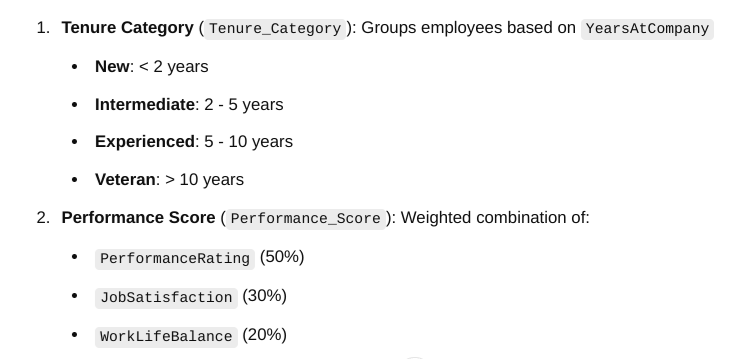

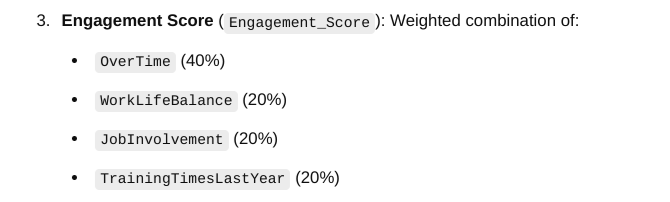

In [ ]:
df=pd.read_csv('/content/cleaned_encoded_employee.csv')

In [ ]:
df.head()

,Unnamed: 0,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,Gender,HourlyRate,...,JobInvolvement,WorkLifeBalance,OverTime,NumCompaniesWorked,JobRole_FreqEncoded,EducationField_FreqEncoded,Department_Research_and_Development,Department_Sales,MaritalStatus_Married,MaritalStatus_Single
0,0,41,1,1102,1,2,1,1,0,94,...,3,1,1,8,285,510,False,True,False,True
1,1,37,1,1373,2,2,1,4,1,92,...,2,3,1,6,217,68,True,False,False,True
2,2,33,2,1392,3,4,1,5,0,56,...,3,3,1,1,243,510,True,False,True,False
3,3,27,1,591,2,1,1,7,1,40,...,3,3,0,9,217,389,True,False,True,False
4,4,32,2,1005,2,2,1,8,1,79,...,3,2,0,0,217,510,True,False,False,True


In [ ]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
df.head()

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,Gender,HourlyRate,JobLevel,...,JobInvolvement,WorkLifeBalance,OverTime,NumCompaniesWorked,JobRole_FreqEncoded,EducationField_FreqEncoded,Department_Research_and_Development,Department_Sales,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,1,0,94,2,...,3,1,1,8,285,510,False,True,False,True
1,37,1,1373,2,2,1,4,1,92,1,...,2,3,1,6,217,68,True,False,False,True
2,33,2,1392,3,4,1,5,0,56,1,...,3,3,1,1,243,510,True,False,True,False
3,27,1,591,2,1,1,7,1,40,1,...,3,3,0,9,217,389,True,False,True,False
4,32,2,1005,2,2,1,8,1,79,1,...,3,2,0,0,217,510,True,False,False,True


In [ ]:
import pandas as pd

# Function to categorize tenure
def tenure_category(years):
    if years < 2:
        return 'New'
    elif years < 5:
        return 'Intermediate'
    elif years < 10:
        return 'Experienced'
    else:
        return 'Veteran'

# Apply tenure category if column exists
if 'YearsAtCompany' in df.columns:
    df['Tenure_Category'] = df['YearsAtCompany'].apply(tenure_category)

# Calculate Performance Score (Weighted) if required columns exist
if {'PerformanceRating', 'JobSatisfaction', 'WorkLifeBalance'}.issubset(df.columns):
    df['Performance_Score'] = (df['PerformanceRating'] * 0.5) + \
                              (df['JobSatisfaction'] * 0.3) + \
                              (df['WorkLifeBalance'] * 0.2)

# Calculate Engagement Score (Weighted) if required columns exist
if {'OverTime', 'WorkLifeBalance', 'JobInvolvement', 'TrainingTimesLastYear'}.issubset(df.columns):
    df['Engagement_Score'] = (df['OverTime'] * 0.4) + \
                             (df['WorkLifeBalance'] * 0.2) + \
                             (df['JobInvolvement'] * 0.2) + \
                             (df['TrainingTimesLastYear'] * 0.2)


In [ ]:
df.head()

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,Gender,HourlyRate,JobLevel,...,NumCompaniesWorked,JobRole_FreqEncoded,EducationField_FreqEncoded,Department_Research_and_Development,Department_Sales,MaritalStatus_Married,MaritalStatus_Single,Tenure_Category,Performance_Score,Engagement_Score
0,41,1,1102,1,2,1,1,0,94,2,...,8,285,510,False,True,False,True,New,2.9,1.2
1,37,1,1373,2,2,1,4,1,92,1,...,6,217,68,True,False,False,True,New,3.0,2.0
2,33,2,1392,3,4,1,5,0,56,1,...,1,243,510,True,False,True,False,Intermediate,3.0,2.2
3,27,1,591,2,1,1,7,1,40,1,...,9,217,389,True,False,True,False,New,2.7,1.8
4,32,2,1005,2,2,1,8,1,79,1,...,0,217,510,True,False,False,True,Intermediate,3.1,1.4


In [ ]:
df.shape

(1244, 40)

In [ ]:
# Save the updated dataset
df.to_csv("feature-engineered-updated.csv", index=False)

In [ ]:
# Display first few rows
df[['YearsAtCompany', 'Tenure_Category', 'Performance_Score', 'Engagement_Score']].head()

,YearsAtCompany,Tenure_Category,Performance_Score,Engagement_Score
0,1.945910,New,2.9,1.2
1,0.000000,New,3.0,2.0
2,2.197225,Intermediate,3.0,2.2
3,1.098612,New,2.7,1.8
4,2.079442,Intermediate,3.1,1.4
